In [1]:
# Import necesary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

2024-05-31 00:36:07.078471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 00:36:07.078620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 00:36:07.246317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Define main directory 
data_dir = '/kaggle/input/flower/train-20240517T020347Z-001/train'

# Define the paths for the train, validation, and test sets
base_dir = '/kaggle/working'
train_dir = os.path.join(base_dir, 'train_split')
val_dir = os.path.join(base_dir, 'val_split')
test_dir = os.path.join(base_dir, 'test_split')

# Create directories 
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all flower types 
flower_types = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

# Copy images to correct directory 
def copy_images(flower_type, images, dest_dir):
    dest_subdir = os.path.join(dest_dir, flower_type)
    if not os.path.exists(dest_subdir):  
        os.makedirs(dest_subdir, exist_ok=True)  # Create destination subdirectory if it doesn't exist
    for image in images:
        src_path = os.path.join(data_dir, flower_type, image)
        dest_path = os.path.join(dest_subdir, image)
        if os.path.isdir(dest_path):
            continue  # Skip if destination is a directory
        shutil.copy(src_path, dest_path)

# defining dataset split
train_split = 0.7
val_split = 0.15
test_split = 0.15

#iteratesthrough each flower copying images to correct directory
for flower_type in flower_types:
    images = os.listdir(os.path.join(data_dir, flower_type))
    train_images, test_images = train_test_split(images, test_size=(1 - train_split), random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=test_split/(val_split + test_split), random_state=42)
    
    copy_images(flower_type, train_images, train_dir)
    copy_images(flower_type, val_images, val_dir)
    copy_images(flower_type, test_images, test_dir)

print("Dataset split successfully into training, validation, and testing subsets.")


Dataset split successfully into training, validation, and testing subsets.


In [3]:
#defining batch and image size and test dataset
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2052 files belonging to 14 classes.


In [4]:


model = keras.models.load_model("/kaggle/input/final-test-model/test_final_model (1).keras")

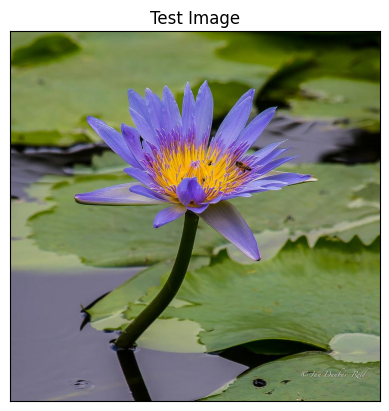

In [5]:
#Test Image Visualization
import cv2
image_path = '/kaggle/working/test_split/water_lily/49320084491_c04a7412b6_c.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(160,160))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [7]:
print(predictions)

[[1.3447033e-05 1.3160607e-04 6.0305840e-05 1.4233061e-04 3.0260155e-05
  4.1533938e-05 7.1133382e-04 1.8173139e-04 9.5433119e-05 4.1150901e-04
  4.9552918e-06 4.0153580e-05 3.8470994e-06 9.9813157e-01]]


In [8]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

13


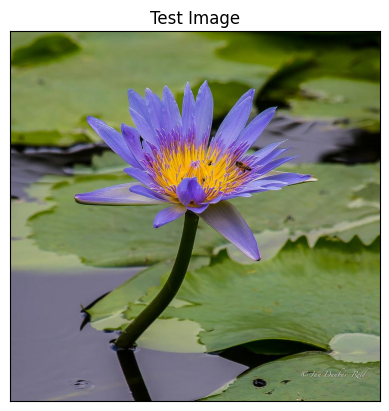

In [9]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
#Single image Prediction
print("It's a {}".format(test_dataset.class_names[result_index]))

It's a water_lily


In [11]:
test_dataset.class_names

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']